**3 Implementation of Sigmoid Regression from Scratch.**

3.1 Building and Testing Helper Function:

1. Implementing Sigmoid Function:

---

**1. Task To Do:**

---



• Implement the Logistic Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [65]:
import numpy as np

In [66]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    y = 1 / (1 + np.exp(-x))
    return y

In [67]:
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test
test_logistic_function()

All tests passed!


**2. Implementing Log Loss Function:**

---



**2. Task To Do:**

---



• Implement the Log - loss Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [68]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y’ in {0-1}.
    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.
    Returns:
    loss (float): loss/error value
    """
    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Compute log loss
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [69]:
#Test function:
y_true, y_pred = 0, 0.1
print(f'log_loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

y_true, y_pred = 1, 0.9
print(f'log_loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log_loss(0, 0.1) ==> 0.10536051565782628
log_loss(1, 0.9) ==> 0.10536051565782628


In [70]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction y_true=1, y_pred=1
    y_true, y_pred = 1, 1
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction y_true=0, y_pred=0
    y_true, y_pred = 0, 0
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Partially correct prediction y_true=1, y_pred=0.8
    y_true, y_pred = 1, 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for y_true=1, y_pred=0.8"

    # Test case 4: Partially correct prediction y_true=0, y_pred=0.2
    y_true, y_pred = 0, 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for y_true=0, y_pred=0.2"

    print("All tests passed!")

# Run the test
test_log_loss()

All tests passed!


**3. Implementing Cost Function:**

---

**3. Task To Do:**

---


• Implement the Cost Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [71]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted probabilities (0-1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    n = len(y_true)

    # Compute log-loss for each observation
    loss_vec = - (y_true * np.log(np.clip(y_pred, 1e-10, 1-1e-10)) + (1 - y_true) * np.log(np.clip(1 - y_pred, 1e-10, 1-1e-10)))

    # Average the losses
    cost = np.sum(loss_vec) / n

    return cost

In [72]:
def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected output: manually calculate
    expected_cost = (-(1 * np.log(0.9)) - (0) * np.log(0.1) +
                     -(0 * np.log(0.1)) - (1) * np.log(0.9) +
                     -(1 * np.log(0.8)) - (0) * np.log(0.2)) / 3

    # Call the cost_function
    result = cost_function(y_true, y_pred)

    # Check if result is close
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
    print("Test passed for simple case!")

# Run the test
test_cost_function()

Test passed for simple case!


**4. Extending the cost function for sigmoid regression to be used with model parameters.**

---

**4. Task To Do:**

---


• Implement the vectorized cost function costfunction logreg Function by completing the
code or writing your own function.

• Make sure you pass the test case.

In [73]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
    X (ndarray, shape (m,n)): data on features, m observations with n features.
    y (array_like, shape (m,)): array of true values of target (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.
    Returns:
    cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute z = Xw + b
    z = np.dot(X, w) + b

    # Compute predictions using the logistic function
    y_pred = logistic_function(z)

    # Compute the cost using the previously defined cost_function
    cost = cost_function(y, y_pred)

    return cost

In [74]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


**5. Implementing Gradient Descent for Training Sigmoid Regression:**

---

**5. Task To Do:**

---


• Implement the compute gradient Function by completing the code or writing your own
function.

• Make sure you pass the test case.

In [75]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
    X (ndarray, shape (n,d)): Input data, n observations with d features
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model
    Returns:
    grad_w (array_like, shape (d,)): Gradients of the cost function w.r.t. weights
    grad_b (float): Gradient of the cost function w.r.t. bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Step 1: Compute predictions
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)  # Using your existing logistic function

    # Step 2: Compute gradients
    error = y_pred - y  # shape (n,)
    grad_w = np.dot(X.T, error) / n  # shape (d,)
    grad_b = np.sum(error) / n       # scalar

    return grad_w, grad_b

In [76]:
# Simple test case
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


**5.2 Gradient Descent for Sigmoid Regression:**


---

**6. Task To Do:**

---


• Implement the gradient descent Function by completing the code or writing your own
function.

• Make sure you pass the test case.

In [77]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    Args:
    X (ndarray, shape (n,d)): Data on features, n observations with d features
    y (array_like, shape (n,)): True values of target (0 or 1)
    w (array_like, shape (d,)): Initial weight parameters
    b (float): Initial bias parameter
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): If True, displays cost every 100 iterations
    show_params (bool): If True, displays parameters every 100 iterations
    Returns:
    w (array_like, shape (d,)): Optimized weight parameters
    b (float): Optimized bias parameter
    cost_history (list): List of cost values over iterations
    params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Step 1: Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Step 2: Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Step 3: Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Step 4: Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Step 5: Optionally print cost and parameters every 100 iterations
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

In [78]:
# Sample data for testing
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,)
b = 0.0                                  # Scalar
alpha = 0.1                              # Learning rate
n_iter = 100                             # Number of iterations

# Run gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Print final results
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 99: Cost = 0.662954

Final parameters:
w: [0.49236201 0.24271295], b: -0.023120387837231953
Final cost: 0.662954


In [79]:
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    assert len(cost_history) == n_iter, "Cost history length mismatch"
    assert w_out.shape == w.shape, "Shape of output weights mismatch"
    assert isinstance(b_out, float), "Bias output is not float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease"

    print("All tests passed!")

# Run the test
test_gradient_descent()

All tests passed!


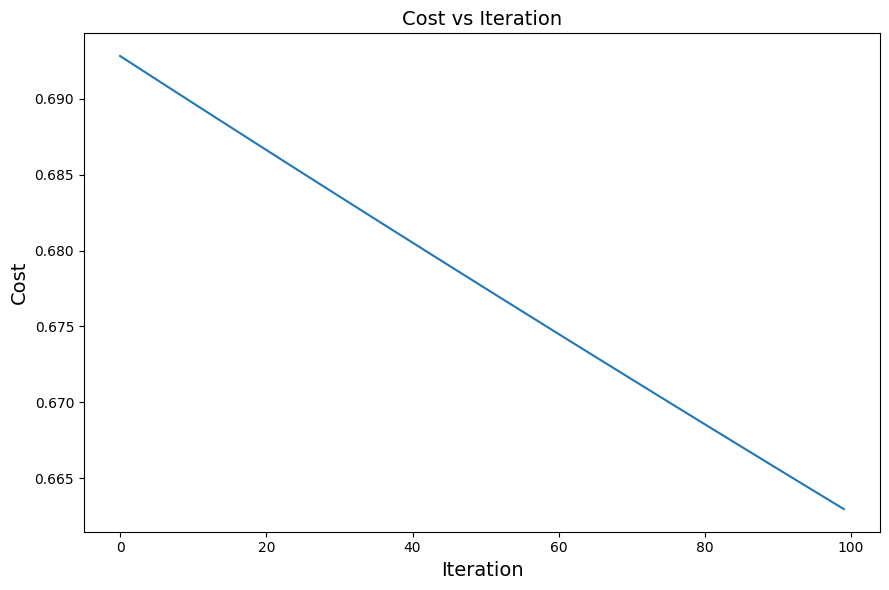

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

**6. Decision/Prediction Function for Binary Classification:**

---

**7. Task To Do:**

---


• Implement the prediction Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [81]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    Arguments:
    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Step 1: Compute z = X*w + b
    z = np.dot(X, w) + b

    # Step 2: Apply the sigmoid (logistic) function
    y_prob = logistic_function(z)

    # Step 3: Convert probabilities to class labels using the threshold
    y_pred = (y_prob >= threshold).astype(int)

    return y_pred

In [82]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])  # Shape (3, 2)
    w_test = np.array([1.0, -1.0])  # Shape (2,)
    b_test = 0.0  # Scalar bias
    threshold = 0.5  # Default threshold

    # Expected output based on the sigmoid probabilities
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assertion test
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

# Run the test
test_prediction()

Test passed!


**7. Evaluating Classifier:**

---

**8. Task To Do:**

---

• Implement evaluate classification Function by completing the code or writing your own
function.

• Make sure you pass the test case.

In [83]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    # True Positives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    # True Negatives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    # False Positives
    FP = np.sum((y_true == 0) & (y_pred == 1))
    # False Negatives
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics

In [84]:
# Sample test
y_true = np.array([1, 0, 1, 0, 1, 0])
y_pred = np.array([1, 0, 0, 0, 1, 1])

metrics = evaluate_classification(y_true, y_pred)
print("Confusion Matrix:\n", metrics["confusion_matrix"])
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1-Score:", metrics["f1_score"])

Confusion Matrix:
 [[2 1]
 [1 2]]
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666


**3.2 Putting Helper Function to Action - Sigmoid Regression for the dataset:**

---


(Dataset Used: "pima-indians-diabetes.data.csv")

**1. Some Basic Data Operation, Loading, Analysis and Cleaning:**

---



In [85]:
# Load dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']

data_pima_diabetes = pd.read_csv(url, names=columns)

In [86]:
# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)

data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [87]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2. Train Test Split and Standard Scaling of the Data:**

---



In [88]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3. Training of the Sigmoid Regression:**

---




Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


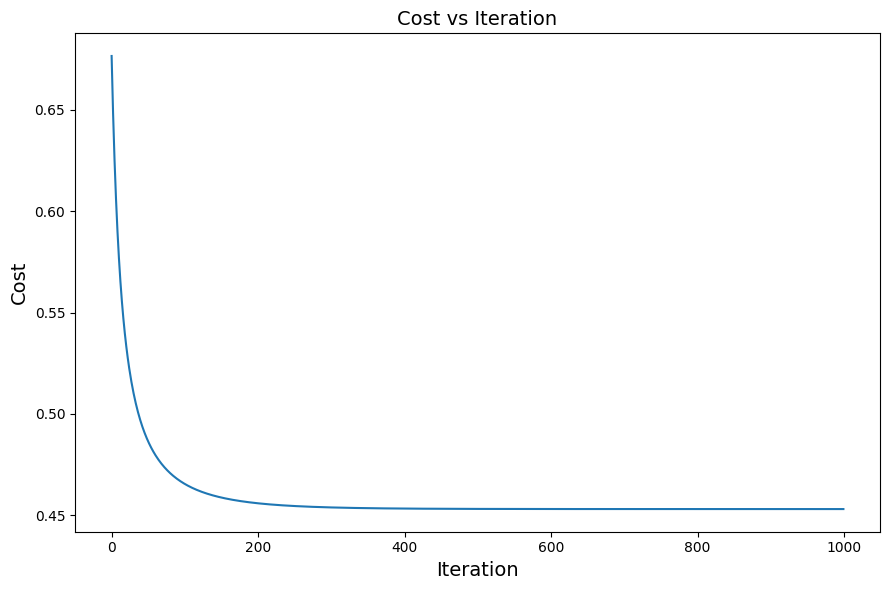

In [89]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

**4. Did the Model Overfitt or Underfitt?**

---



In [90]:
# Make sure targets are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


**5. How well my model did?**

---




Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


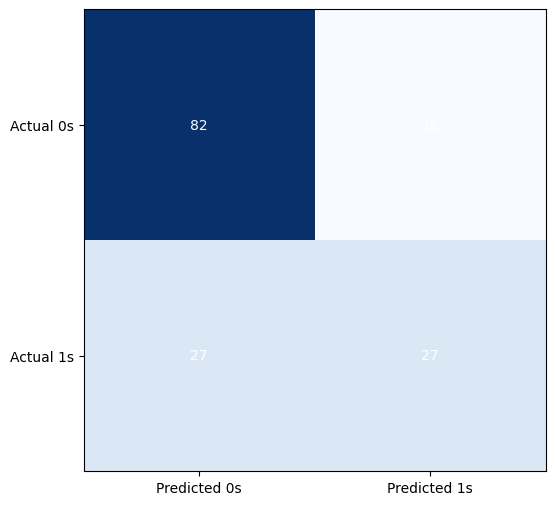

In [91]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Optional - Visualizing the Confusion Matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap="Blues")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')

plt.show()